In [1]:
num_samples = 1
max_heatmap_dim = 100

In [2]:
f = open("backend/heatmap/heatmap_profiling/heatmap_sampling_times.csv", "a")
f.write(f"i,create_vis_time,maintain_metadata_time,display_time,total_time,execute_time\n")
f.close()
iter_lst = [(k%max_heatmap_dim) + 1 for k in range(num_samples*max_heatmap_dim)]
for i in iter_lst:
    print(i)
    import pandas as pd
    import lux
    import profile
    import pstats
    from lux.vis.Vis import Vis
    df = pd.read_csv('data/airbnb_1000000.csv')
    lux.config.heatmap_bin_size = i
    profile.run('display(Vis(["availability_365","host_id"],df))', f"backend/heatmap/heatmap_profiling/heatmap_altair_{i}.pstats")
    p = pstats.Stats(f"backend/heatmap/heatmap_profiling/heatmap_altair_{i}.pstats")
    f_times = p.get_stats_profile().func_profiles
    execute_time = f_times['execute'].cumtime
    create_vis_time = f_times['create_vis'].cumtime
    maintain_metadata_time = f_times['maintain_metadata'].cumtime
    display_time = f_times['display'].cumtime
    total_time = f_times['display(Vis(["availability_365","host_id"],df))'].cumtime
    f = open("backend/heatmap/heatmap_profiling/heatmap_sampling_times.csv", "a")
    f.write(f"{i},{create_vis_time},{maintain_metadata_time},{display_time},{total_time},{execute_time}\n")
    print(create_vis_time, maintain_metadata_time, display_time, total_time, execute_time)
    f.close()
    %reset -f
from datetime import datetime
import os
now = datetime.now()
date_str = now.strftime('%m-%d-%y--%H-%M')
new_name = f'backend/heatmap/heatmap_profiling/heatmap_sampling_times--{date_str}.csv'
os.rename('backend/heatmap/heatmap_profiling/heatmap_sampling_times.csv', new_name)

1 0


/Users/kunalagarwal/anaconda3/lib/python3.7/site-packages/lux/executor/PandasExecutor.py:422: UserWarning:
Lux detects that the attribute 'last_review' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['last_review'] = pd.to_datetime(df['last_review'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If last_review is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'last_review':'quantitative'})


LuxWidget(current_vis={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'axis': {'labelCo…

FileNotFoundError: [Errno 2] No such file or directory: 'heatmap_profiling/heatmap_altair_1.pstats'

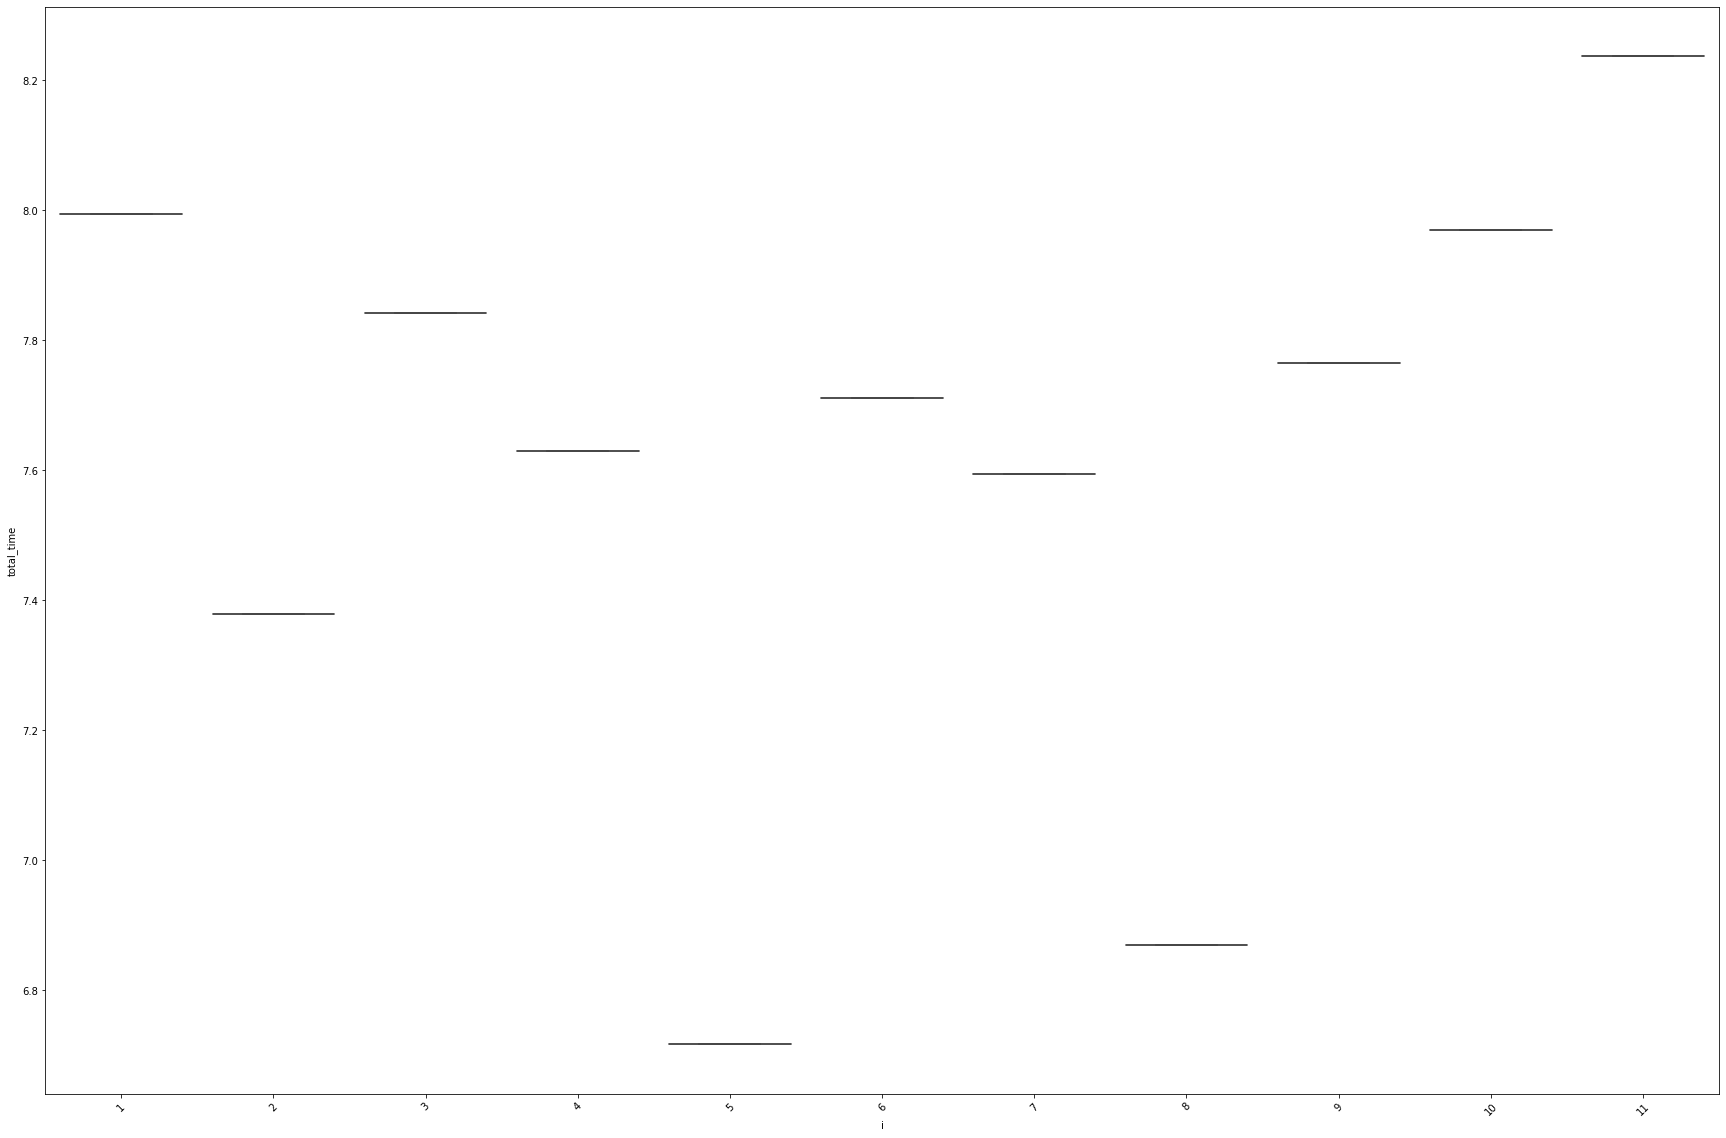

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(30, 20))
df = pd.read_csv(new_name)
sns.boxplot(x='i', y='total_time', data=df, showfliers=False)
ax = plt.gca()
plt.xticks(rotation = 45)
plt.title('Heatmap generation performance as granularity increases');
plt.savefig(f"backend/heatmap/heatmap_profiling/sampling_boxplots--{date_str}.png")

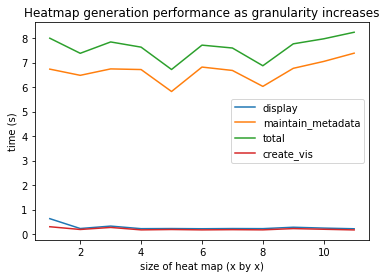

In [8]:
size = len(df['display_time'])
plt.plot(range(1, size+1), df['display_time'], label='display')
plt.plot(range(1, size+1), df['create_vis_time'], label='create_vis')
plt.legend();
plt.xlabel('size of heat map (x by x)')
plt.ylabel('time (s)')
plt.title('Heatmap generation performance as granularity increases');
plt.savefig(f"backend/heatmap/heatmap_profiling/display_plot--{date_str}.png")

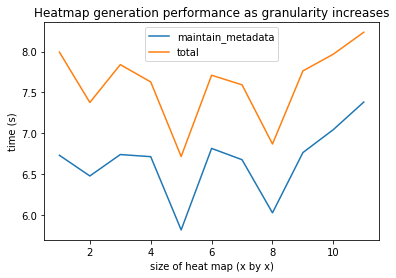

In [10]:
size = len(df['display_time'])
plt.plot(range(1, size+1), df['maintain_metadata_time'], label='maintain_metadata')
plt.plot(range(1, size+1), df['total_time'], label='total')
plt.legend();
plt.xlabel('size of heat map (x by x)')
plt.ylabel('time (s)')
plt.title('Heatmap generation performance as granularity increases');
plt.savefig(f"backend/heatmap/heatmap_profiling/total_time_plot--{date_str}.png")